In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [86]:
data = pd.read_csv('amplificador.dat')
data

,mV
0,7521.2
1,7556.1
2,7478.0
3,7495.1
4,7487.3
...,...
195,7490.7
196,7544.2
197,7487.1
198,7455.1


In [87]:
voltages = data['mV']

In [88]:
#Cálculo del valor medio
voltages.mean()

7501.8

In [89]:
#Cálculo de desviación estandar
voltages.std()

26.810389495951405

In [90]:
#Creación del histograma de frecuencias con dV=2.5mV y dV=10mV
frequencys1, limits1 = np.histogram(voltages, bins=int((voltages.max()-voltages.min())/2.5))
frequencys2, limits2 = np.histogram(voltages, bins=int((voltages.max()-voltages.min())/10))

zero = np.array([0])

frequencys1 = np.concatenate((zero, frequencys1, zero))
limits1 = np.concatenate((limits1[0:1], limits1))

frequencys2 = np.concatenate((zero, frequencys2, zero))
limits2 = np.concatenate((limits2[0:1], limits2))

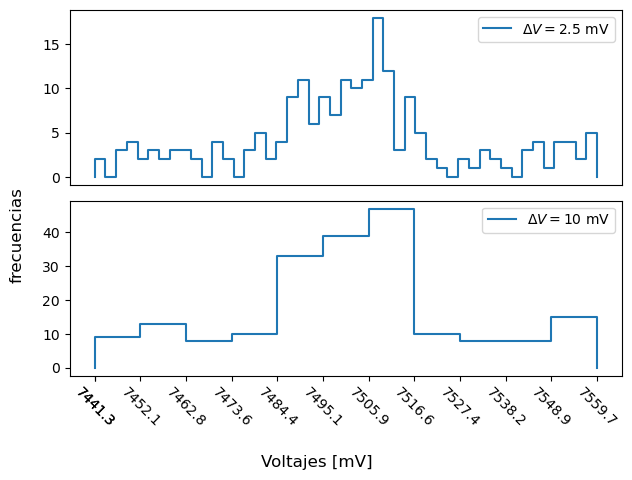

In [91]:
#Plotting
fig = plt.figure()
fig.supylabel('frecuencias')
fig.supxlabel('Voltajes [mV]')

ax1 = fig.add_subplot(2,1,1)
ax1.plot(limits1, frequencys1, drawstyle='steps-post', label=r'$\Delta V = 2.5$ mV')
ax1.set_xticks([])
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(limits2, frequencys2, drawstyle='steps-post', label=r'$\Delta V = 10$ mV')
ax2.set_xticks(limits2)
ax2.tick_params(axis='x', labelrotation = -45)
ax2.legend()

fig.tight_layout()
fig.savefig('voltage_hist.png')

In [92]:
#Media y desviación estandar a partir de los histogramas
Vmedio1 = (limits1[1:-1]+limits1[2:])/2
Vmedio2 = (limits2[1:-1]+limits2[2:])/2

mu1 = np.dot(frequencys1[1:-1], Vmedio1)/np.sum(frequencys1[1:-1])
mu2 = np.dot(frequencys2[1:-1], Vmedio2)/np.sum(frequencys2[1:-1])

sigma1 = np.sqrt(np.dot(frequencys1[1:-1], (Vmedio1-mu1)**2)/np.sum(frequencys1[1:-1]))
sigma2 = np.sqrt(np.dot(frequencys2[1:-1], (Vmedio2-mu2)**2)/np.sum(frequencys2[1:-1]))

print(f'mu_1 = {mu1} mv \nsig_1 = {sigma1} mv \nmu_2 = {mu2} mv \nsig_2 = {sigma2} mv')

mu_1 = 7501.772170212765 mv 
sig_1 = 26.67801024558702 mv 
mu_2 = 7501.791636363636 mv 
sig_2 = 26.770096295482723 mv


In [93]:
cuentas = np.array([147, 152, 153, 171, 146, 168, 145, 133, 168, 171])

In [94]:
sigma_c = np.round(np.sqrt(cuentas), 2)
sigma_c

array([12.12, 12.33, 12.37, 13.08, 12.08, 12.96, 12.04, 11.53, 12.96,
       13.08])

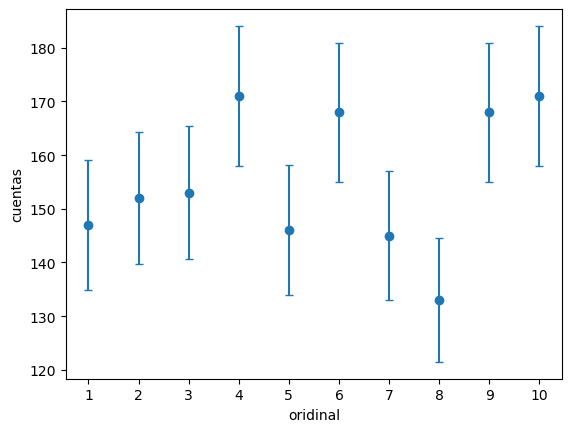

In [95]:
plt.errorbar(np.arange(1, cuentas.size+1), cuentas, yerr=sigma_c, fmt='o', capsize=3)
plt.xlabel('oridinal')
plt.ylabel('cuentas')
plt.xticks(np.arange(1, cuentas.size+1))
plt.show()

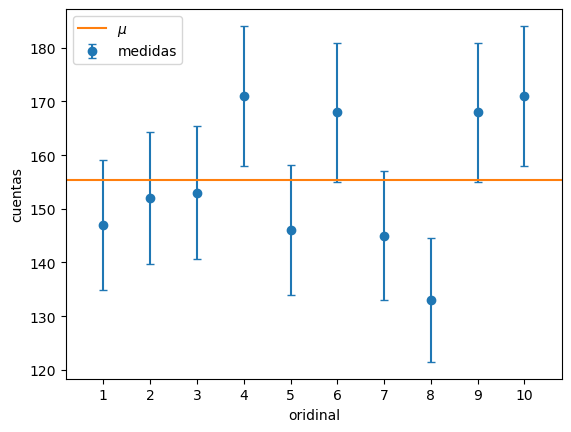

In [96]:
mu = cuentas.mean()
x = np.arange(1, cuentas.size+1)

plt.errorbar(x, cuentas, yerr=sigma_c, fmt='o', capsize=3, label = 'medidas')
plt.plot(1.5*x-2, mu*np.ones(cuentas.size), label = r'$\mu$')
plt.xlim(0.2, 10.8)
plt.xlabel('oridinal')
plt.ylabel('cuentas')
plt.xticks(x)
plt.legend()
plt.show()

In [97]:
std = np.sqrt(np.sum((cuentas-mean)**2)/(cuentas.size-1))
mu, std

(155.4, 13.293273152655486)

In [98]:
sig_mu = np.sqrt(np.sum(cuentas)/cuentas.size**2)
sig_mu

3.9420806688854046

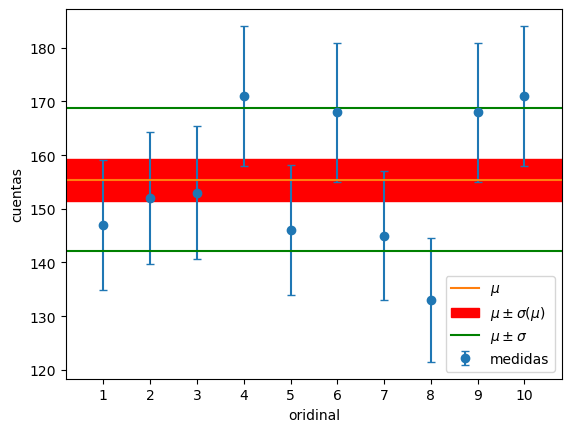

In [ ]:
plt.errorbar(x, cuentas, yerr=sigma_c, fmt='o', capsize=3, label = 'medidas')
plt.plot(1.5*x-2, mu*np.ones(cuentas.size), label = r'$\mu$')
plt.fill_between(1.5*x-2, (mu - sig_mu)*np.ones(cuentas.size), (mu + sig_mu)*np.ones(cuentas.size), color = 'red', alpha = 0.2, label = r'$\mu \pm \sigma(\mu)$')
plt.plot(1.5*x-2, (mu + std)*np.ones(cuentas.size), color = 'green', label = r'$\mu \pm \sigma$')
plt.plot(1.5*x-2, (mu - std)*np.ones(cuentas.size), color = 'green')
plt.xlim(0.2, 10.8)
plt.xlabel('oridinal')
plt.ylabel('cuentas')
plt.xticks(x)
plt.legend()
plt.show()

In [100]:
t = np.array([6.5, 9.3, 14.6])
x = np.array([3.2, 9.7, 11.3])
sig_x = np.array([1.2, 2.1, 3.6])

a1_A = (x[1]-x[0])/(t[1]-t[0])
a0_A = x[0]-a1_A*t[0]

a1_B = (x[2]-x[0])/(t[2]-t[0])
a0_B = x[0]-a1_B*t[0]

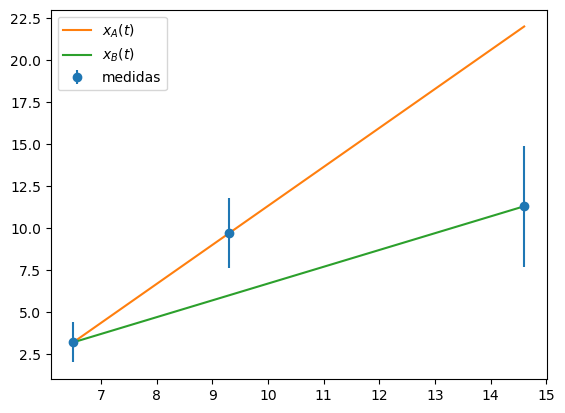

In [101]:
plt.errorbar(t, x, yerr = sig_x, fmt='o', label = 'medidas')
plt.plot(t, a0_A+a1_A*t, label = r'$x_A(t)$')
plt.plot(t, a0_B+a1_B*t, label = r'$x_B(t)$')
plt.legend()